In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class AR:
    def __init__(self, *args, epsilon, Y0):
        self.phi = np.array(args)
        self.epsilon = epsilon
        self.Y0 = np.array(Y0)
        self.memory = np.array([])
        self.YPast = np.array(self.Y0)
    def simulate_nPeriods(self, n=1):
        simulate_nPeriods(self, n)
    
    #def clear_memory(self):
    #    self.memory = np.array([]) 
    def statistics(self):
        return statistics(self)
    
    def plot(self):
        plot(self)
    
    def save(self, file_name):
        save(self, file_name)

# helpers  fuctions

def simulate_onePeriod(ar, eps):
    y_onePeriod_ahead = ar.phi@ar.YPast + eps
    ar.YPast = np.append(y_onePeriod_ahead, ar.YPast[:-1])
    ar.memory = np.append(ar.memory, y_onePeriod_ahead)

def simulate_nPeriods(ar, n):
    eps = ar.epsilon(n)
    for i in range(n):
        simulate_onePeriod(ar, eps[i])

def statistics(ar):
    mu_val = np.mean(ar.memory)
    sigma_val = np.std(ar.memory)
    corr_val = np.corrcoef(ar.memory[1:], ar.memory[:-1])[0,1]
    return f"平均數:{mu_val:.4f}, 變異數:{sigma_val:.4f}, 相關係數:{corr_val:.4f}"

def plot(ar):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 4))
    plt.plot(ar.memory)
    plt.title("AR(1) process")
    plt.xlabel("preiod")
    plt.ylabel("y")
    plt.show()

def save(ar, file_name):
    df = pd.DataFrame(ar.memory)
    if file_name.endswith('.xlsx'):
        df.to_excel(file_name, index=False)
    elif file_name.endswith('.txt'):
        df.to_csv(file_name, index=False, sep='\t')
    elif file_name.endswith('.csv'):
        df.to_csv(file_name, index=False)
    else:
        raise ValueError("file_name must end with .xlsx or .txt or .csv")

# Path: final_project.ipynb
# 1.1
#ar = AR(0.5, epsilon=lambda n: np.random.normal(0, 1, n), Y0=0)
#ar.simulate_nPeriods(100)
#ar.plot()
#print(ar.statistics())


In [2]:
def Epsilon(mu, sigma):
    def draw(size):
        return np.random.normal(mu, sigma, size)
    return draw


epsilon = Epsilon(0, 1)

In [3]:
ar = AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])
ar.simulate_nPeriods(100)
print(ar.YPast)
print(ar.memory)

[0.00882833 1.08297933]
[ 3.42298938e-01  7.97189725e-01  2.67784153e+00  1.20582053e+00
  1.55489146e+00  6.52568697e-01 -6.41566750e-01  1.27322803e+00
  3.99084654e-01 -5.46131144e-01 -8.58407714e-01  1.25524593e+00
  1.73262653e+00  1.93181587e+00  3.56071994e-01  2.54606934e-01
  2.14785477e+00  2.75097433e+00  2.44854782e+00  1.18079089e+00
  1.17415339e+00 -2.60746046e-01  5.58854841e-01  1.99435308e+00
  1.36723920e+00  1.40767658e+00 -1.83295673e+00 -8.92450447e-01
  5.54320779e-01  1.00629221e+00  7.40198171e-02 -9.16762063e-03
 -1.49290325e+00  1.21464434e+00  2.07541786e+00  5.90708063e-01
 -2.53360325e-01 -3.44113865e-01  2.57227530e-01 -5.38865141e-01
 -9.76969330e-01 -2.63426893e-02 -2.95174165e-01 -7.93577961e-01
 -1.06129847e+00 -1.00505306e+00  1.68508710e-01  8.14173527e-01
 -3.01502991e-01 -2.43693465e-03 -2.57106104e+00 -1.33397859e+00
 -2.69047568e+00 -1.54370770e+00 -7.79931102e-01 -5.90647009e-01
  2.46880912e-02 -6.58379295e-01 -1.06542311e+00 -2.05924195e+00
 

In [6]:
ar.statistics()

'平均數:0.0428, 變異數:1.3742, 相關係數:0.5236'

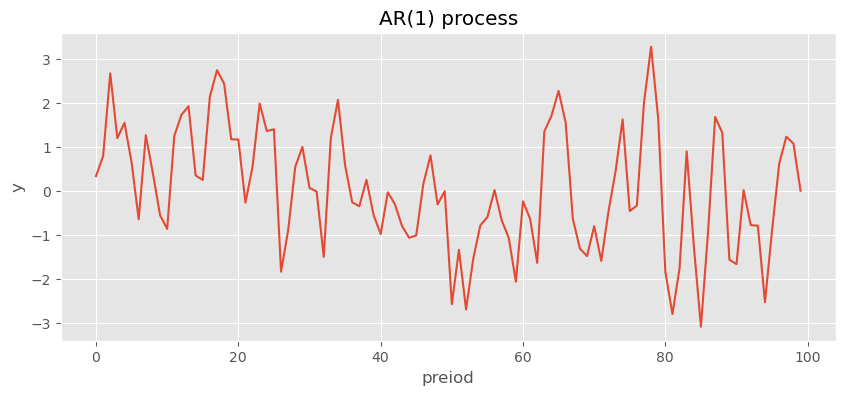

In [7]:
ar.plot()

In [23]:
ar.save('test.xlsx')
ar.save('test2.txt')
ar.save('test3.csv')

In [5]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.arange(1, len(ar.memory)+1), y=ar.memory))

- MA (Moving average) model
    - `mu` 是ＭＡ模型的平均值
    - `theta` 是ＭＡ模型的係數，使用者可以自行設定 
    - `epsilon` 是ＭＡ模型的隨機誤差項，透過helper function 中`np.random.normal`產生白噪音 $ N(0,\sigma^2)$  
$$ X_t = \mu +\epsilon_t +\sum_{i}^{q} \theta_{i}\epsilon_{t-i}$$

- 統計量
  - 平均數
$$ E(X_t) = E(\mu +\epsilon_t +\sum_{i}^{q} \theta_{i}\epsilon_{t-i})$$
可以推導出 $ E(X_t) = \mu $ 
  - 變異數
$$ Var(X_t) = Var(\mu +\epsilon_t +\sum_{i}^{q} \theta_{i}\epsilon_{t-i})$$
可以推導出 $ Var(X_t) = \sigma^2(1+\sum_{i}^{q} \theta_{i}^2) $ 


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MA:
    def __init__(self, q, theta, mu, sigma):
       if isinstance(q, int):
        self.q = q  # MA model order
        self.theta = np.array(theta)  # MA coefficients
        self.mu = mu  # Mean of the series
        self.sigma = sigma  # Standard deviation of the noise
        self.memory = np.zeros(q)  # Initialize memory to store past noise values
       elif isinstance(q, float): 
        raise ValueError("q must be an integer")
       """條件需要符合 q 是整數，否則會報錯，需要有套件"""
    
    def simulate(self, n=1):
        """
        預設參數為模擬一期，可以自行設定調用模擬期數
        """
        return simulate(self, n)
    
    def statistics(self):
        return statistics(self)
    
    def covariance(self, k):
        if isinstance(k, int):
            return covariance(self, k)
        else:
            raise ValueError("k must be an integer")

    def plot(self):
        plot(self, self.q) 
    
    def save(self, file_name):
        save(self, file_name)   

#################### helpers  fuctions ####################
def simulate(self, n=1):
    noise = np.random.normal(0, self.sigma, n + self.q)  # Generate noise terms
    X = np.zeros(n)
    for t in range(n):
        X[t] = self.mu + noise[t + self.q]  # Current noise term
        for i in range(min(self.q, t+1)):
             X[t] += self.theta[i] * noise[t + self.q - i - 1]  # Past noise terms
        self.memory = np.append(self.memory, X[t])  # Update memory with new value
    return X

def plot(ma, q):
    plt.style.use('ggplot')
    plt.figure(figsize=(10, 4))
    plt.plot(ma.memory, marker='o')
    plt.title(f"MA({q}) Process")  
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()

def statistics(ma):
    mean = ma.mu
    variance = ma.sigma**2 * (1 + np.sum(ma.theta**2))
    return f"平均數:{mean:.4f}, 變異數:{variance:.4f}"

def covariance(ma, k):
        # Compute the covariance of the MA process at lag k
    for k in range(1,k+1):
        if k > ma.q:
            covariance = 0
        else:
            theta_padded = np.append(ma.theta, np.zeros(k))  # Pad theta with zeros for lag
            covariance = ma.sigma**2 * np.sum(theta_padded[k:ma.q+k] * ma.theta[:ma.q])
        print(f"共變異數（lag {k}）: {covariance:.4f}")

def save(ma, file_name):
    df = pd.DataFrame(ma.memory)
    if file_name.endswith('.xlsx'):
        df.to_excel(file_name, index=False)
    elif file_name.endswith('.txt'):
        df.to_csv(file_name, index=False, sep='\t')
    elif file_name.endswith('.csv'):
        df.to_csv(file_name, index=False)
    else:
        raise ValueError("file_name must end with .xlsx or .txt or .csv")


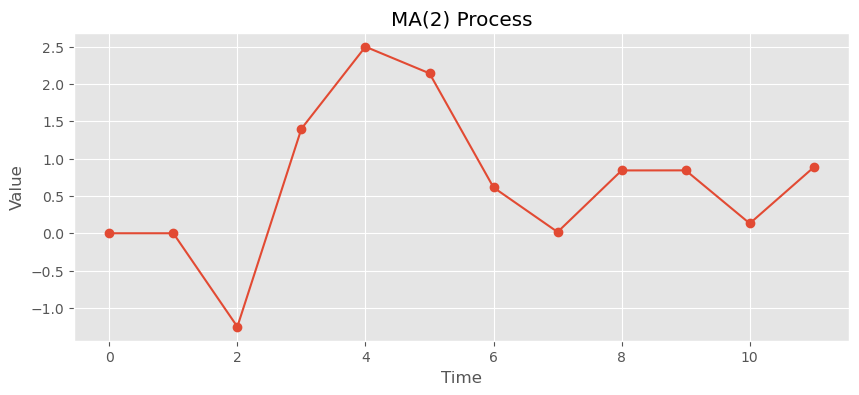

In [9]:

# Example usage:
# Create an MA(2) model with specific parameters
ma = MA(q=2, theta=[0.5, -0.3], mu=0, sigma=1)
ma.simulate(10)
ma.memory
ma.plot()


In [13]:
ma.covariance(10)
    

共變異數（lag 1）: -0.1500
共變異數（lag 2）: 0.0000
共變異數（lag 3）: 0.0000
共變異數（lag 4）: 0.0000
共變異數（lag 5）: 0.0000
共變異數（lag 6）: 0.0000
共變異數（lag 7）: 0.0000
共變異數（lag 8）: 0.0000
共變異數（lag 9）: 0.0000
共變異數（lag 10）: 0.0000


In [11]:
ma.save('ma_test.csv')

In [12]:
ma.statistics()


(0, 1.3399999999999999)

In [13]:
for i in range(10):
    print(ma.covariance(i))



0.33999999999999997
-0.15
0.0
0
0
0
0
0
0
0


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class MA:
    def __init__(self, q, theta, mu, sigma):
       if isinstance(q, int):
        self.q = q  
        self.theta = np.array(theta)  
        self.mu = mu  
        self.sigma = sigma  
        self.memory = np.zeros(q)  
       elif isinstance(q, float): 
        raise ValueError("q must be an integer")
       """條件需要符合 q 是整數，否則會報錯，需要有套件"""

    def simulate(self, n=1):
        # Simulate n periods of the MA process
        noise = np.random.normal(0, self.sigma, n + self.q)  
        X = np.zeros(n)
        for t in range(n):
            X[t] = self.mu + noise[t + self.q]  # Current noise term
            for i in range(min(self.q, t+1)):
                X[t] += self.theta[i] * noise[t + self.q - i - 1]  # Past noise terms
            self.memory = np.append(self.memory, X[t])  # Update memory with new value
        return X



    def statistics(self):
        # Compute the mean and variance of the simulated MA process
        mean = self.mu
        variance = self.sigma**2 * (1 + np.sum(self.theta**2))
        return mean, variance

    #def covariance(self, k):
        # Compute the covariance of the MA process at lag k
    #    if k > self.q:
    #        return 0
    #    else:
    #        theta_padded = np.append(self.theta, np.zeros(k))  # Pad theta with zeros for lag
    #        covariance = self.sigma**2 * np.sum(theta_padded[k:self.q+k] * self.theta[:self.q])
    #        return covariance
    def covariance(self, k):
    # Compute the covariance of the MA process at lag k for k in range(1, max_k)
        for k in range(1, k+1):
            if k > self.q:
                cov = 0
                print(f"共變異數（lag {k}）: {cov:.4f}")
            else:
                theta_padded = np.append(self.theta, np.zeros(k))  # Pad theta with zeros for lag
                cov = self.sigma**2 * np.sum(theta_padded[k:self.q+k] * self.theta[:self.q])
            print(f"共變異數（lag {k}）: {cov:.4f}")

    def plot(self):
        plt.figure(figsize=(10, 4))
        plt.plot(self.memory, marker='o')
        plt.title("MA(q) Process")
        plt.xlabel("Time")
        plt.ylabel("Value")
        plt.show()

# Example usage:
ma_model = MA(q=3, theta=[0.5, -0.3,-0.2], mu=0, sigma=1)
ma_model.simulate(n=100)
mean, variance = ma_model.statistics()
print(f"平均數: {mean}, 變異數: {variance}")
ma_model.covariance(6)

平均數: 0, 變異數: 1.38
共變異數（lag 1）: -0.0900
共變異數（lag 2）: -0.1000
共變異數（lag 3）: 0.0000
共變異數（lag 4）: 0.0000
共變異數（lag 4）: 0.0000
共變異數（lag 5）: 0.0000
共變異數（lag 5）: 0.0000
共變異數（lag 6）: 0.0000
共變異數（lag 6）: 0.0000


In [ ]:

ma_model.plot()



In [ ]:
for k in range(1, 4):  # Compute covariance for a few lags
    cov = ma_model.covariance(k)
    print(f"共變異數（lag {k}）: {cov}")

In [5]:
from ar_ma_class import MA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
ma=MA(q=4, theta=[0.5, -0.3, 0.2,0.5], mu=0, sigma=1)
ma.simulate(n=100)


array([-0.11991651, -0.86346615,  1.22117242,  2.06516717,  0.28598335,
        0.40628227,  0.23211991, -0.5148841 ,  1.88795086,  1.62771709,
       -0.90912246, -1.8406216 ,  1.62022132,  0.91811369,  0.56880221,
        0.59456308,  0.14719099, -1.03123521, -0.5028883 , -1.7017565 ,
       -1.13800462, -0.96091337, -1.80047915, -0.51344103, -0.91764273,
       -2.54288571, -1.30872482, -0.25753393, -1.57148409, -1.15764682,
        1.3286948 , -0.77533993, -1.81983931, -1.05027807, -1.40040069,
       -1.60388145,  0.51614589,  0.5022887 , -1.28155935,  0.13652133,
        0.85497389,  0.88723836, -0.99773364,  1.31697981,  1.30761888,
       -1.49240289, -0.09162403,  1.89420475,  0.56564612,  0.42597717,
        0.96085831,  0.6570828 ,  0.4723564 , -1.6441136 , -0.88479995,
        2.49070444,  0.02204076, -0.26426656,  2.24414667,  0.64275783,
       -1.15888315,  1.85547037, -0.45759761, -2.10709004, -0.70716125,
        0.33337539, -0.84193524, -2.3708234 , -0.64112935,  0.82

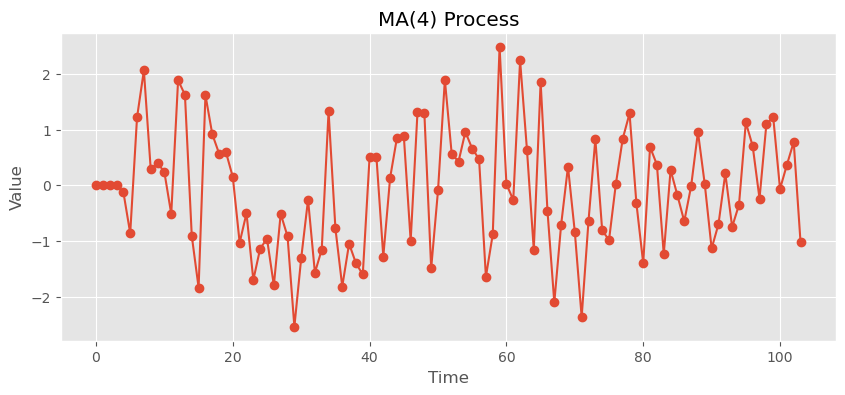

In [6]:

ma.plot()


In [11]:

ma.covariance(5)


0

In [8]:

ma.statistics()


'平均數:0.0000, 變異數:1.6300'

In [20]:
ar=AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])
corr_val = np.corrcoef(ar.memory[1:], ar.memory[:-1])[0,1]
print(corr_val) 

nan


In [25]:
np.corrcoef(ar.memory[1:], ar.memory[:-1])

array([[nan, nan],
       [nan, nan]])

$ cov(X_t ,X_{t-4}) \rightarrow 0 $

In [4]:
import numpy as np

class ARMA:
    def __init__(self, p, q, phi, theta, c, mu,sigma):
        self.p = p  # Order of the AR component
        self.q = q  # Order of the MA component
        self.phi = np.array(phi)  # AR coefficients
        self.theta = np.array(theta)  # MA coefficients
        self.c = c  # Constant term
        self.sigma = sigma  # Standard deviation of the noise
        self.mu = mu  #mean  of the noise
        self.memory = np.zeros(max(p, q))  # Initialize memory for AR and MA parts
        self.noise_memory = np.zeros(q)  # Memory for noise terms in MA part
    def simulate(self, n=1):
        simulate(self, n) 

    def statistics(self):
        return statistics(self)

    def plot(self):
        plot(self, self.p, self.q)
    
    def save(self, file_name):
        save(self, file_name)
#################### helpers  fuctions #################### 
#def simulate(arma, n=1):
#    X = np.zeros(n)
#    for t in range(n):
#        noise = np.random.normal(arma.mu, arma.sigma)
#        # AR part
#        X[t] = arma.c + noise + np.dot(arma.phi[:min(t, arma.p)], arma.memory[:min(t, arma.p)])
#        # MA part
#        X[t] += np.dot(arma.theta[:min(t+1, arma.q)], arma.noise_memory[:min(t+1, arma.q)])
#        arma.memory = np.concatenate(([X[t]], arma.memory))
#        arma.noise_memory = np.concatenate(([noise], arma.noise_memory))
#    return X


def simulate(arma, n=1):
    X = np.zeros(n)
    for t in range(n):
        noise = np.random.normal(arma.mu, arma.sigma)
            # AR part
        X[t] = arma.c + noise
        for i in range(min(t, arma.p)):
            X[t] += arma.phi[i] * arma.memory[i]
            # MA part
        for j in range(min(t+1, arma.q)):
            X[t] += arma.theta[j] * arma.noise_memory[j]
        arma.memory = np.concatenate(([X[t]], arma.memory))
        arma.noise_memory = np.concatenate(([noise], arma.noise_memory))
    return X

def statistics(arma):
    mean = arma.c / (1 - np.sum(arma.phi))
    variance = arma.sigma**2 * (1 + np.sum(arma.theta**2) + 2 * np.sum(arma.phi**2))
    return f"平均數:{mean:.4f}, 變異數:{variance:.4f}"
def plot(arma, p, q):
    plt.figure(figsize=(10, 4))
    plt.plot(arma.memory, marker='o')
    plt.title(f"ARMA({p}, {q}) Process")
    plt.xlabel("period")
    plt.ylabel("Value")
    plt.show()



def save(arma, file_name):
    df = pd.DataFrame(arma.memory)
    if file_name.endswith('.xlsx'):
        df.to_excel(file_name, index=False)
    elif file_name.endswith('.txt'):
        df.to_csv(file_name, index=False, sep='\t')
    elif file_name.endswith('.csv'):
        df.to_csv(file_name, index=False)
    else:
        raise ValueError("file_name must end with .xlsx or .txt or .csv")

In [2]:
import matplotlib.pyplot as plt
arma=ARMA(p=3, q=3, phi=[0.5, -0.3,0.2], theta=[0.5, -0.3,0.1], c=0, mu=0, sigma=1)
arma.simulate(n=100

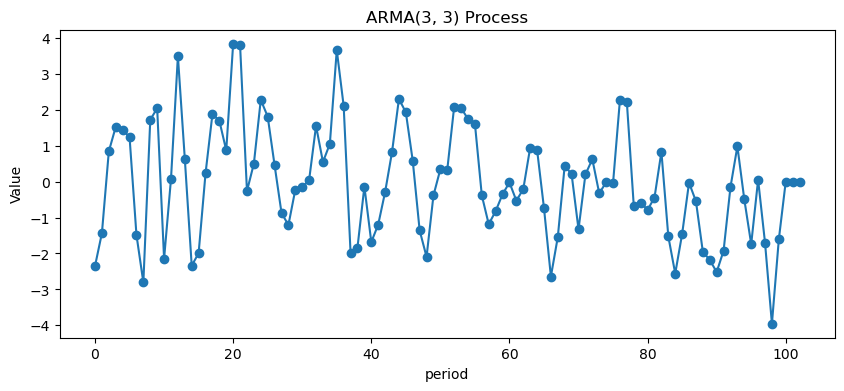

In [3]:
arma.plot()

In [18]:
arma.statistics()

'平均數:0.0000, 變異數:2.1100'

In [ ]:
def simulate(self, n=1):
    X = np.zeros(n)
    for t in range(n):
        noise = np.random.normal(self.mu, self.sigma)
        # AR part
        X[t] = self.c + noise
        for i in range(min(t, self.p)):
            X[t] += self.phi[i] * self.memory[-i-1]
        # MA part
        for j in range(min(t+1, self.q)):
            X[t] += self.theta[j] * self.noise_memory[-j-1]
        # Update memories
        self.memory.insert(0, X[t])
        self.noise_memory.insert(0, noise)
    return X

In [3]:
class ARMA:
    def __init__(self, p, q, phi, theta, c, mu, sigma):
        self.p = p  # Order of the AR component
        self.q = q  # Order of the MA component
        self.phi = np.array(phi)  # AR coefficients
        self.theta = np.array(theta)  # MA coefficients
        self.c = c  # Constant term
        self.mu = mu  # Mean of the noise
        self.sigma = sigma  # Standard deviation of the noise
        self.memory = np.zeros(max(p, q))  # Initialize memory for AR and MA parts
        self.noise_memory = np.zeros(q)  # Memory for noise terms in MA part

    def simulate(self, n=1):
        X = np.zeros(n)
        for t in range(n):
            noise = np.random.normal(self.mu, self.sigma)
            # AR part
            X[t] = self.c + noise
            for i in range(min(self.p, t+1)):  # Ensure we don't go past the start of the series
                X[t] += self.phi[i] * self.memory[i]
            # MA part
            for j in range(min(self.q, t+1)):  # Ensure we don't go past the start of the noise memory
                X[t] += self.theta[j] * self.noise_memory[j]
            # Update memories
            self.memory = np.roll(self.memory, 1)
            self.memory[0] = X[t]
            self.noise_memory = np.roll(self.noise_memory, 1)
            self.noise_memory[0] = noise
        return X
ARMA(p=2, q=2, phi=[0.5, -0.3], theta=[0.5, -0.3], c=0, mu=0, sigma=1).simulate(n=100)

array([ 3.33217055,  3.66984395, -0.89074405, -2.27960222, -2.06127489,
       -0.92791397,  0.73500577,  1.26448556,  1.65379031,  1.2008482 ,
        1.63608187,  0.69670409, -0.90939686, -0.998806  ,  0.16824535,
        2.1100718 ,  1.84725648,  0.5166468 ,  1.63555254,  2.07978271,
       -1.3757815 , -1.92766634, -0.10021706, -0.51973989, -1.32471277,
        1.41535586,  1.43099905, -1.12338115, -0.29450667,  0.36762355,
       -0.62036747, -0.68012466,  0.82680362,  1.12699697, -0.0566154 ,
       -0.42738472, -1.02112716, -1.41596629, -0.02289328,  0.22868708,
        0.21670669,  1.05590827, -1.57507723, -1.58117381,  1.38608929,
        1.16643802,  0.69317447,  3.12130415,  2.62433746, -0.38847274,
       -0.81091494,  1.79560659,  1.36455089, -1.53560777, -0.63344266,
        0.54123583,  0.05432197,  0.55315486,  0.53032297, -2.31152262,
       -2.8752803 ,  0.31092031,  1.6536774 ,  1.1299491 ,  0.27619119,
       -1.74003392, -2.10491157,  0.01519565,  0.26671783,  0.24

In [ ]:

# Example usage:
p = 2  # AR order
q = 2  # MA order
phi = [0.5, -0.2]  # AR coefficients
theta = [0.4, 0.3]  # MA coefficients
c = 0  # Constant term
sigma = 1  # Standard deviation of the noise
mu = 0 #mean  of the noise
arma_model = ARMA(p, q, phi, theta, c,mu, sigma)
X = arma_model.simulate(100)
X
# Now you can plot X or analyze it further


In [ ]:
def __init__(self, p, q, phi, theta, c, mu, sigma):
    if not isinstance(p, int) or not isinstance(q, int):
        raise ValueError("p and q must be integers")
    if len(phi) != p:
        raise ValueError("Length of phi must be equal to p")
    if len(theta) != q:
        raise ValueError("Length of theta must be equal to q")
    self.p = p  # Order of the AR component
    self.q = q  # Order of the MA component
    self.phi = np.array(phi)  # AR coefficients
    self.theta = np.array(theta)  # MA coefficients
    self.c = c  # Constant term
    self.sigma = sigma  # Standard deviation of the noise
    self.mu = mu  #mean  of the noise
    self.memory = np.zeros(max(p, q))  # Initialize memory for AR and MA parts
    self.noise_memory = np.zeros(q)  # Memory for noise terms in MA part

In [1]:

from ar_ma_class import MA
from ar_ma_class import AR
import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
#ma=MA(q=3, theta=[0.5, -0.3,0.3], mu=1, sigma=3)
#ma.simulate(n=100)
#ma.plot()
#print(ma.statistics(),ma.covariance(5))

In [2]:
def Epsilon(mu, sigma):
    def draw(size):
        return np.random.normal(mu, sigma, size)
    return draw

epsilon = Epsilon(0, 1)

ar=AR(0.8, -0.35, epsilon=epsilon, Y0=[0,0])
ar.simulate_nPeriods(100)
print(ar.YPast)
print(ar.memory)
ar.epsilon(100)


[-1.26125426 -2.20515818]
[-0.9467299  -1.93131636 -1.28602417  0.20185664  1.00168594  1.73380514
  1.53004116  0.73611801  1.55798182  1.53847858  0.37501377 -1.42722567
 -1.45428691 -1.34685254 -2.76882036 -1.18474381 -1.90235337 -0.99578523
  0.95471869  1.52711754  1.76729004 -0.26508553 -0.68405718 -0.57980446
  0.53713296  0.23457347  0.11202965 -0.65468913  0.8426498  -1.01724611
 -0.53251978 -0.23293308  0.77153299  2.34886017  0.36967965 -0.71811502
 -2.2997302  -0.21363401  0.33540803  0.91728252 -1.77249703 -0.85089272
 -1.8890258  -0.31616459  0.48195725 -0.70042503 -1.40333902  0.0645386
 -0.01030742 -1.72158709 -2.11236381 -1.78595524  0.31896922  0.66828757
 -0.03291724 -1.65971735 -0.4188883  -0.040825   -1.05283764 -1.43777674
 -1.27023499 -2.43970957 -2.01086024 -0.67634695  0.12425644 -0.66973398
  0.02252913 -0.13215726  0.64970408  0.92429989  0.12348349  0.2614273
  1.20815384 -1.83368584 -1.14504652  1.01069514  1.32215972  0.06280964
  1.09278852  0.90543477 -0

array([ 0.91159955, -0.74050926, -0.90736724, -0.92260527, -0.32078137,
        1.70704321, -0.40324015,  0.25842214, -1.07774271, -0.09263117,
       -1.70022218,  0.05263361, -0.01411601,  0.3643565 ,  0.12285014,
       -0.98565694,  0.88257538,  0.82467283, -1.06105865,  0.42181285,
        0.54330926, -0.53214059,  0.22305107,  1.14826246,  0.03758127,
        0.12791093, -1.90938984,  0.01832043,  1.03404763,  0.05705083,
       -0.32593191,  1.00061547, -0.47094074,  1.21021768,  0.32151744,
        0.91247391,  0.70307995,  1.4883574 , -0.33711129, -0.9705185 ,
        0.46004826,  0.08781691,  2.31171307,  0.3383145 , -0.49716719,
        1.1064578 , -0.52137483, -0.86530623,  1.12062156,  1.26349275,
        0.05741665,  0.28795329,  1.2303694 , -0.12884552,  0.37200534,
       -1.83864382,  0.63091113,  0.55379649, -0.15290293, -1.46201712,
        0.34372512, -1.07705883, -1.29323328, -0.5984877 , -0.67775583,
        0.70785202, -0.14613603,  0.37030405, -0.44881994,  0.62

In [5]:
ar.plot(q=2)

TypeError: AR.plot() got an unexpected keyword argument 'q'

In [1]:
import numpy as np
from scipy.optimize import minimize

class ARMA:
    def __init__(self, p, q, phi, theta, c, mu,sigma):
        self.p = p  # Order of the AR component
        self.q = q  # Order of the MA component
        self.phi = np.array(phi)  # AR coefficients
        self.theta = np.array(theta)  # MA coefficients
        self.c = c  # Constant term
        self.sigma = sigma  # Standard deviation of the noise
        self.mu = mu  #mean  of the noise
        self.memory = np.zeros(max(p, q))  # Initialize memory for AR and MA parts
        self.noise_memory = np.zeros(q)  # Memory for noise terms in MA part
    def simulate(self, n=1):
        simulate(self, n) 

    def statistics(self):
        return statistics(self)

    def plot(self):
        plot(self, self.p, self.q)
    
    def save(self, file_name):
        save(self, file_name)


#################### helpers  fuctions #################### 
def simulate(arma, n=1):
    X = np.zeros(n)
    for t in range(n):
        noise = np.random.normal(arma.mu, arma.sigma)
        # AR part
        X[t] = arma.c + noise + np.dot(arma.phi[:min(t, arma.p)], arma.memory[:min(t, arma.p)])
        # MA part
        X[t] += np.dot(arma.theta[:min(t+1, arma.q)], arma.noise_memory[:min(t+1, arma.q)])
        arma.memory = np.concatenate(([X[t]], arma.memory))
        arma.noise_memory = np.concatenate(([noise], arma.noise_memory))
    return X


#def simulate(arma, n=1):
#    X = np.zeros(n)
#    for t in range(n):
#        noise = np.random.normal(arma.mu, arma.sigma)
#            # AR part
#        X[t] = arma.c + noise
#        for i in range(min(t, arma.p)):
#            X[t] += arma.phi[i] * arma.memory[i]
#            # MA part
#        for j in range(min(t+1, arma.q)):
#            X[t] += arma.theta[j] * arma.noise_memory[j]
#        arma.memory = np.concatenate(([X[t]], arma.memory))
##        arma.noise_memory = np.concatenate(([noise], arma.noise_memory))
 #   return X

def statistics(arma):
    mean = arma.c / (1 - np.sum(arma.phi))
    variance = arma.sigma**2 * (1 + np.sum(arma.theta**2) + 2 * np.sum(arma.phi**2))
    return f"平均數:{mean:.4f}, 變異數:{variance:.4f}"
def plot(arma, p, q):
    plt.figure(figsize=(10, 4))
    plt.plot(arma.memory, marker='o')
    plt.title(f"ARMA({p}, {q}) Process")
    plt.xlabel("period")
    plt.ylabel("Value")
    plt.show()



def save(arma, file_name):
    df = pd.DataFrame(arma.memory)
    if file_name.endswith('.xlsx'):
        df.to_excel(file_name, index=False)
    elif file_name.endswith('.txt'):
        df.to_csv(file_name, index=False, sep='\t')
    elif file_name.endswith('.csv'):
        df.to_csv(file_name, index=False)
    else:
        raise ValueError("file_name must end with .xlsx or .txt or .csv")

In [6]:
arma=ARMA(p=2, q=2, phi=[0.5, -0.3], theta=[0.5, -0.3], c=0, mu=0, sigma=1 )
arma.simulate(n=100)
arma.memory

array([-1.00463234, -0.87062647, -1.12728076, -1.22001892,  0.39536047,
        1.81441555,  1.20509902, -0.33274747,  0.5223195 , -0.4200198 ,
       -2.43544536, -1.60918872,  1.73702841,  3.27945276,  0.51620692,
       -2.59751311, -2.98335824, -0.72786364,  2.47970406,  1.97160219,
        0.61567194,  1.83044653, -0.42778529, -2.9080364 , -1.28088621,
        0.89996069,  1.45795548,  0.42166212, -0.20100682, -0.34929855,
        0.57893779,  1.36191692, -0.72221573,  0.28746007,  0.96630359,
       -0.13851635, -0.19735003, -0.84006433, -1.32500958, -0.7309312 ,
        0.33532001,  0.57568766,  1.71583514,  1.93881804,  1.10453155,
       -1.76331394, -3.13203584, -0.46860798, -0.16663247, -0.58423126,
        1.40472849,  2.11118125, -0.05581645, -2.17916078, -1.90517585,
        0.49819378,  1.79732447,  0.51349552, -1.24140728, -3.06133748,
       -2.69563319, -1.53063671, -0.37013646,  1.15723147,  2.46565704,
        2.47982339, -0.15209879, -1.13922965,  1.2640362 ,  2.19

In [1]:
import numpy as np
from scipy.optimize import minimize

class ARMA:
    def __init__(self, p, q, phi, theta, c, mu,sigma):
        self.p = p  # Order of the AR component
        self.q = q  # Order of the MA component
        self.phi = np.array(phi)  # AR coefficients
        self.theta = np.array(theta)  # MA coefficients
        self.c = c  # Constant term
        self.sigma = sigma  # Standard deviation of the noise
        self.mu = mu  #mean  of the noise
        self.memory = np.zeros(max(p, q))  # Initialize memory for AR and MA parts
        self.noise_memory = np.zeros(q)



def simulate(arma, n=1):
    X = np.zeros(n)
    for t in range(n):
        noise = np.random.normal(arma.mu, arma.sigma)
        # AR part
        X[t] = arma.c + noise + np.dot(arma.phi[:min(t, arma.p)], arma.memory[:min(t, arma.p)])
        # MA part
        X[t] += np.dot(arma.theta[:min(t+1, arma.q)], arma.noise_memory[:min(t+1, arma.q)])
        arma.memory = np.concatenate(([X[t]], arma.memory))
        arma.noise_memory = np.concatenate(([noise], arma.noise_memory))
    return X

In [5]:
arma=ARMA(p=2, q=2, phi=[0.5, -0.3], theta=[0.5, -0.3], c=0, mu=0, sigma=1)
arma.simulate(n=100)

AttributeError: 'ARMA' object has no attribute 'simulate'

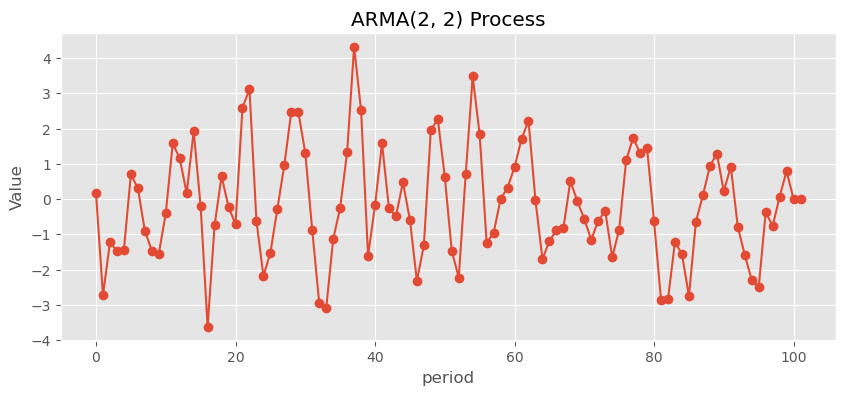

In [5]:
from arma_final import ARMA
arma=ARMA(p=2, q=2, phi=[0.5, -0.3], theta=[0.5, -0.3], c=0, mu=0, sigma=1)
arma.simulate(n=100)
arma.memory,arma.noise_memory
arma.plot()
arma.statistics()
arma.save('arma_test.csv')  
arma.fit

In [7]:
import pandas as pd 
pd.read_csv('arma_test.csv')    
arma.fit()

,0
0,0.169831
1,-2.724571
2,-1.226977
3,-1.464442
4,-1.432723
...,...
97,-0.763207
98,0.068423
99,0.792296
100,0.000000


In [1]:
import os 
os.getcwd() 

'/Users/heng/Desktop/eco_programe/eco_pro'

In [5]:
from private_arma import AR
ar=AR(p=2,  phi=[0.2,0.3], c=1.0, mu=0.0, sigma=1.0)


In [3]:
ar.phi

array([0.2, 0.3])

In [6]:
ar.plot

<bound method AR.plot of <private_arma.AR object at 0x166f04f90>>

In [7]:
ar.simulate(1)
ar.memory.shape

(3,)

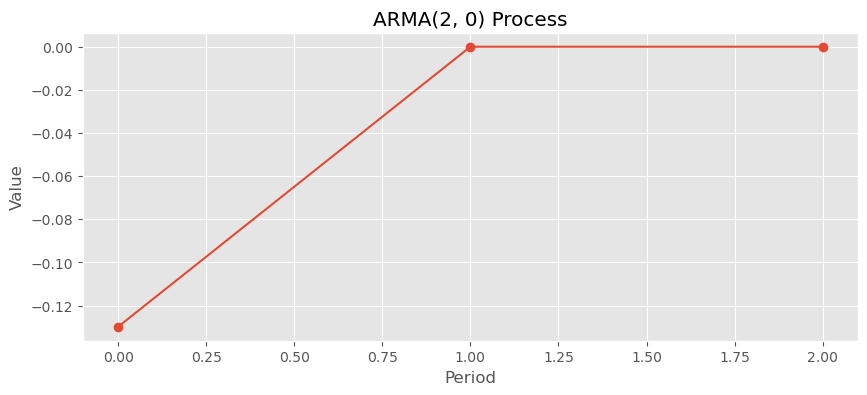

In [8]:
ar.plot()

In [9]:
ar.statistics()

'Mean: 2.0000, Variance: 1.2600'

In [10]:
ar.save('ar_test.csv')

'File saved as ar_test.csv'

In [1]:
from private_arma import ARMA
ARMA(p=2, q=2, phi=[0.5, -0.3], theta=[0.5, -0.3], c=0, mu=0, sigma=1)._statistics()

'Mean: 0.0000, Variance: 2.0200'

In [7]:
from private_arma import MA
ma=MA(q=2, theta=[0.5, -0.3], c =3,mu=0, sigma=1)

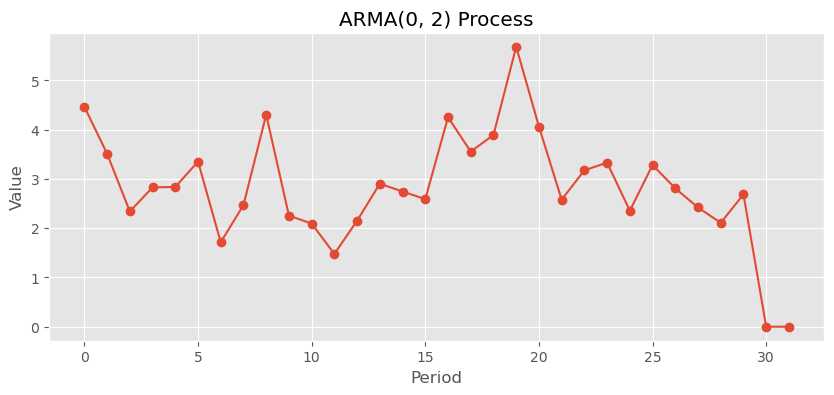

'File saved as ma_test.csv'

In [10]:
ma.simulate(10)
ma.plot()
ma.statistics()
ma.save('ma_test.csv')